# Implementation of magnetic field with periodic boundary conditions

### Import statements

In [1]:
import sys
import kwant
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Include '../code' into the path
sys.path.insert(1,'../code') 

In [3]:
## Import local modules 
import finite_graphene as fg
import builders_with_magnetic_field as bm

## Building a graphene strip with periodic boudary condition

In [4]:
width  = 1
length = 10

lat_graph  = bm.graphene
shape      = bm.Rectangle(width, length, pbc=True)
system     = bm.make_graphene_strip(lat_graph, shape)

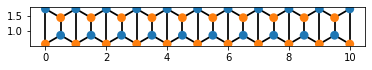

In [5]:
kwant.plot(system);

In [6]:
leads = bm.make_graphene_leads(lat_graph, shape)

In [7]:
for lead in leads:
    system.attach_lead(lead)

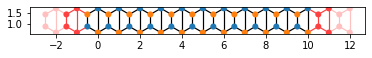

In [8]:
kwant.plot(system);

## Analysing the leads before being attached

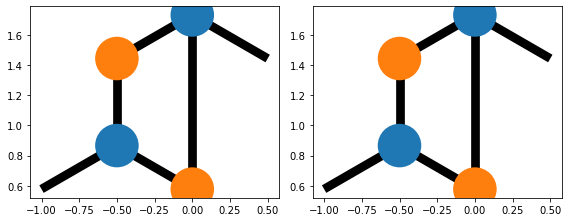

In [9]:
fig, axis = plt.subplots(ncols=2, figsize=(8,4))

kwant.plot(leads[0], ax = axis[0]);
kwant.plot(leads[1], ax = axis[1]); # THE "RIGHT" LEAD LOOKS WIRD = SAME OF LEFT LEAD

for ax in axis:
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

In [10]:
len(leads[0].sites()) # NUMBER OF SITES

4

In [11]:
## SITES' TAGS
for s in leads[0].sites():
    print(s.tag)

[0 0]
[-1 1]
[-1 1]
[-1 2]


In [12]:
def sites_positions_id(system):
    ## SITES POSITIONS
    print("id \t x \t y")
    print("---------------------")
    for n, s in enumerate(system.sites()):
        print(f"{n} \t {round(s.pos[0],2)} \t {round(s.pos[1],2)}")

In [13]:
sites_positions_id(leads[0])

id 	 x 	 y
---------------------
0 	 0.0 	 0.58
1 	 -0.5 	 1.44
2 	 -0.5 	 0.87
3 	 0.0 	 1.73


In [14]:
## HOPPINGS
for hop in leads[0].hoppings():
    print(f"{hop[0].family.name}:{hop[0].tag} --- {hop[1].family.name}{hop[1].tag}")

Graphene0:[-1 1] --- Graphene1[-1 1]
Graphene0:[-1 1] --- Graphene1[-1 0]
Graphene0:[-1 1] --- Graphene1[0 0]
Graphene0:[-1 2] --- Graphene1[-1 1]
Graphene0:[-1 2] --- Graphene1[0 1]
Graphene0:[-1 2] --- Graphene1[0 0]


In [75]:
## DEFINING THE PARAMETERS OF THE SYSTEM TO TEST THE HAMILTONIAN:

area_cell = np.sqrt(3)/2   # unit cell area
Bflux = 0.1                  # flux of magnetic field in units of quantum of flux 
Bfield = Bflux/area_cell
pbc_phase = 0

parameters_hand = dict(V = -4,
                       t = 2.6,
                       phi = pbc_phase,
                       lambda_iso = 12e-6,
                       B = Bfield,
                       x_Binf = 1,
                       x_Bsup = 4,
                       peierls = bm.peierls_scatter,
                       peierls_pbc = bm.peierls_pbc,
                       peierls_lead_L = bm.peierls_lead_L,
                       peierls_pbc_L = bm.peierls_pbc_L,
                       peierls_lead_R = bm.peierls_lead_R,
                       peierls_pbc_R = bm.peierls_pbc_R)

In [76]:
## "FINALIZING" THE NON-ATTACHED LEADS 

final_lead_L = leads[0].finalized()
final_lead_R = leads[1].finalized()

sub_matrix_L = final_lead_L.hamiltonian_submatrix(params = parameters_hand)
sub_matrix_R = final_lead_R.hamiltonian_submatrix(params = parameters_hand)

In [77]:
sub_matrix_L.shape

(12, 12)

In [78]:
# print(sub_matrix_L[:,:].real.round(2))

In [79]:
## PBC HOPPING WITHOUT MAGNETIC FIELD:

t = parameters_hand['t']
phi = parameters_hand['phi']

peiels_phase_L = 2j * np.pi * Bfield/2 * (2*parameters_hand['x_Binf']) * (-1/np.sqrt(3))
pbc_hopping_L = -t * np.exp(-1j*phi) * np.exp(peiels_phase_L)

peiels_phase_R = 2j * np.pi * Bfield/2 * (2*parameters_hand['x_Bsup']) * (-1/np.sqrt(3))
pbc_hopping_R = -t * np.exp(-1j*phi) * np.exp(peiels_phase_R)

print("\nWe expect that the pbc_L hopping be equal to\n \t {:.2f} + {:.2f}j\n".format(pbc_hopping_L.real, pbc_hopping_L.imag))
print("\nWe expect that the pbc_R hopping be equal to\n \t {:.2f} + {:.2f}j\n".format(pbc_hopping_R.real, pbc_hopping_R.imag))


We expect that the pbc_L hopping be equal to
 	 -2.38 + 1.06j


We expect that the pbc_R hopping be equal to
 	 0.27 + 2.59j



In [80]:
print(parameters_hand['x_Binf'], parameters_hand['x_Bsup']) 

1 4


In [81]:
# print([hop for hop in leads[0].hopping_value_pairs()])

In [82]:
# final_lead_L.hoppings

In [83]:
# dir(final_lead_L)

In [84]:
# dir(final_lead_L)

In [85]:
print(final_lead_L.cell_hamiltonian(params=parameters_hand).real.round(2))

[[-4.    0.   -2.38  0.    0.    0.   -2.54 -0.  ]
 [ 0.   -4.    0.   -2.38  0.    0.   -0.   -2.54]
 [-2.38  0.   -4.    0.   -2.54 -0.    0.    0.  ]
 [ 0.   -2.38  0.   -4.   -0.   -2.54  0.    0.  ]
 [ 0.    0.   -2.54 -0.   -4.    0.   -2.38  0.  ]
 [ 0.    0.   -0.   -2.54  0.   -4.    0.   -2.38]
 [-2.54 -0.    0.    0.   -2.38  0.   -4.    0.  ]
 [-0.   -2.54  0.    0.    0.   -2.38  0.   -4.  ]]


In [86]:
print(final_lead_R.cell_hamiltonian(params=parameters_hand).real.round(2))

[[-4.    0.    0.27  0.    0.    0.   -1.74 -0.  ]
 [ 0.   -4.    0.    0.27  0.    0.   -0.   -1.74]
 [ 0.27  0.   -4.    0.   -1.74 -0.    0.    0.  ]
 [ 0.    0.27  0.   -4.   -0.   -1.74  0.    0.  ]
 [ 0.    0.   -1.74 -0.   -4.    0.    0.27  0.  ]
 [ 0.    0.   -0.   -1.74  0.   -4.    0.    0.27]
 [-1.74 -0.    0.    0.    0.27  0.   -4.    0.  ]
 [-0.   -1.74  0.    0.    0.    0.27  0.   -4.  ]]


In [87]:
final_lead_L.id_by_site.values()

dict_values([0, 1, 2, 3, 4, 5])

In [72]:
def sites_families_tags_id(system):
    for n, site in enumerate(system.sites):
        print(f"{site.family.name}\t{site.tag}\t{n}")

In [73]:
sites_families_tags_id(final_lead_L)

Graphene0	[-1 1]	0
Graphene1	[-1 1]	1
Graphene0	[-1 2]	2
Graphene1	[0 0]	3
Graphene0	[0 1]	4
Graphene1	[0 1]	5


In [74]:
sites_families_tags_id(final_lead_R)

Graphene0	[-1 2]	0
Graphene1	[0 0]	1
Graphene0	[-1 1]	2
Graphene1	[-1 1]	3
Graphene0	[-2 2]	4
Graphene1	[-1 0]	5


In [38]:
site_00 = [s for s in final_lead_L.sites if s.tag == [0,0]]

In [39]:
final_lead_L.id_by_site[site_00[0]]

3

## Leads after being attached to the system

In [38]:
dir(system.leads[0])

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 'builder',
 'finalized',
 'interface',
 'padding']

In [42]:
help(system.leads[0].finalized())

Help on InfiniteSystem in module kwant.builder object:

class InfiniteSystem(_FinalizedBuilderMixin, kwant.system.InfiniteSystem)
 |  InfiniteSystem(builder, interface_order=None)
 |  
 |  Finalized infinite system, extracted from a `Builder`.
 |  
 |  Attributes
 |  ----------
 |  sites : sequence
 |      ``sites[i]`` is the `~kwant.builder.Site` instance that corresponds
 |      to the integer-labeled site ``i`` of the low-level system.
 |  id_by_site : dict
 |      The inverse of ``sites``; maps high-level `~kwant.builder.Site`
 |      instances to their integer label.
 |      Satisfies ``id_by_site[sites[i]] == i``.
 |  
 |  Notes
 |  -----
 |  In infinite systems ``sites`` consists of 3 parts: sites in the fundamental
 |  domain (FD) with hoppings to neighboring cells, sites in the FD with no
 |  hoppings to neighboring cells, and sites in FD+1 attached to the FD by
 |  hoppings. Each of these three subsequences is individually sorted.
 |  
 |  Method resolution order:
 |      Inf

In [44]:
fsyst_lead_0 = system.leads[0].finalized()

In [45]:
dir(fsyst_lead_0)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_cons_law',
 '_init_discrete_symmetries',
 '_symmetries',
 'cell_hamiltonian',
 'cell_size',
 'discrete_symmetry',
 'graph',
 'hamiltonian',
 'hamiltonian_submatrix',
 'hoppings',
 'id_by_site',
 'inter_cell_hopping',
 'modes',
 'onsites',
 'parameters',
 'pos',
 'selfenergy',
 'site_ranges',
 'sites',
 'symmetry',
 'validate_symmetries']

In [53]:
sites_families_tags_id(fsyst_lead_0)

Graphene0	[-1 1]	0
Graphene1	[-1 1]	1
Graphene0	[-1 2]	2
Graphene1	[0 0]	3
Graphene0	[0 1]	4
Graphene1	[0 1]	5


In [76]:
for site in fsyst_lead_0.sites:
    print(site.pos)

[-0.5 0.8660254037844386]
[-0.5 1.4433756729740645]
[0.0 1.7320508075688772]
[0.0 0.5773502691896258]
[0.5 0.8660254037844386]
[0.5 1.4433756729740645]


In [77]:
fsyst_lead_1 = system.leads[1].finalized()

In [78]:
for site in fsyst_lead_1.sites:
    print(site.pos)

[0.0 1.7320508075688772]
[0.0 0.5773502691896258]
[-0.5 0.8660254037844386]
[-0.5 1.4433756729740645]
[-1.0 1.7320508075688772]
[-1.0 0.5773502691896258]
